# Cancer Classification
## Malignant or Benign

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from sklearn.datasets import load_breast_cancer
data_set = load_breast_cancer()

In [68]:
data = pd.DataFrame(data=data_set['data'],columns=data_set['feature_names'])
label = pd.DataFrame(data=data_set['target'],columns=['Benign'])

In [69]:
data = pd.concat([data,label],axis=1)
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  Benign  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

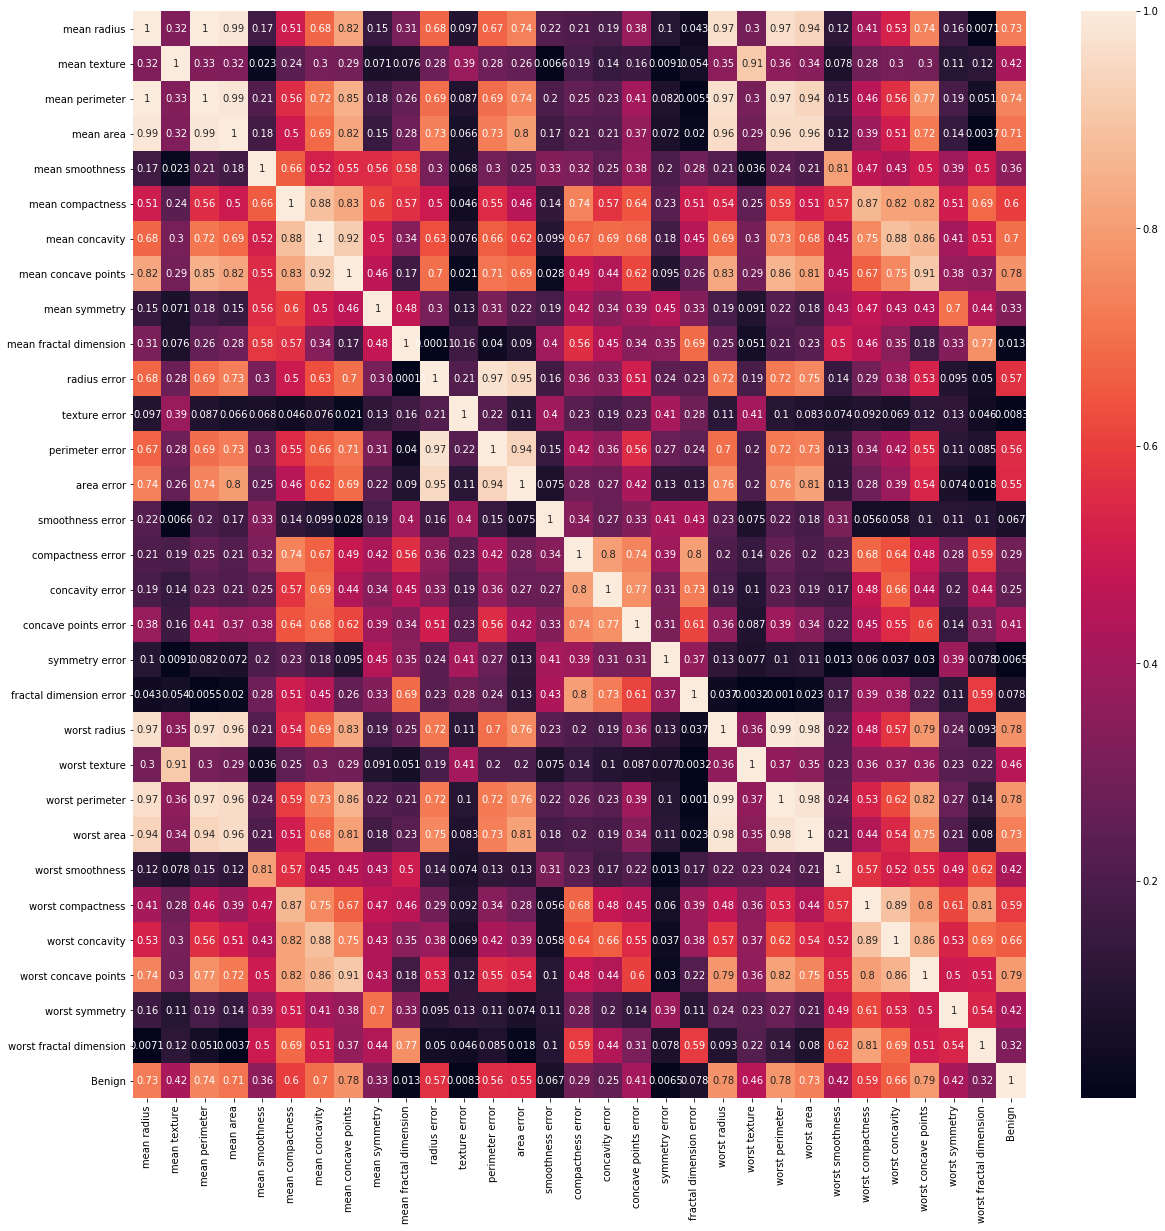

In [49]:
plt.figure(figsize=[20,20])
sns.heatmap(abs(data.corr()),annot=True)

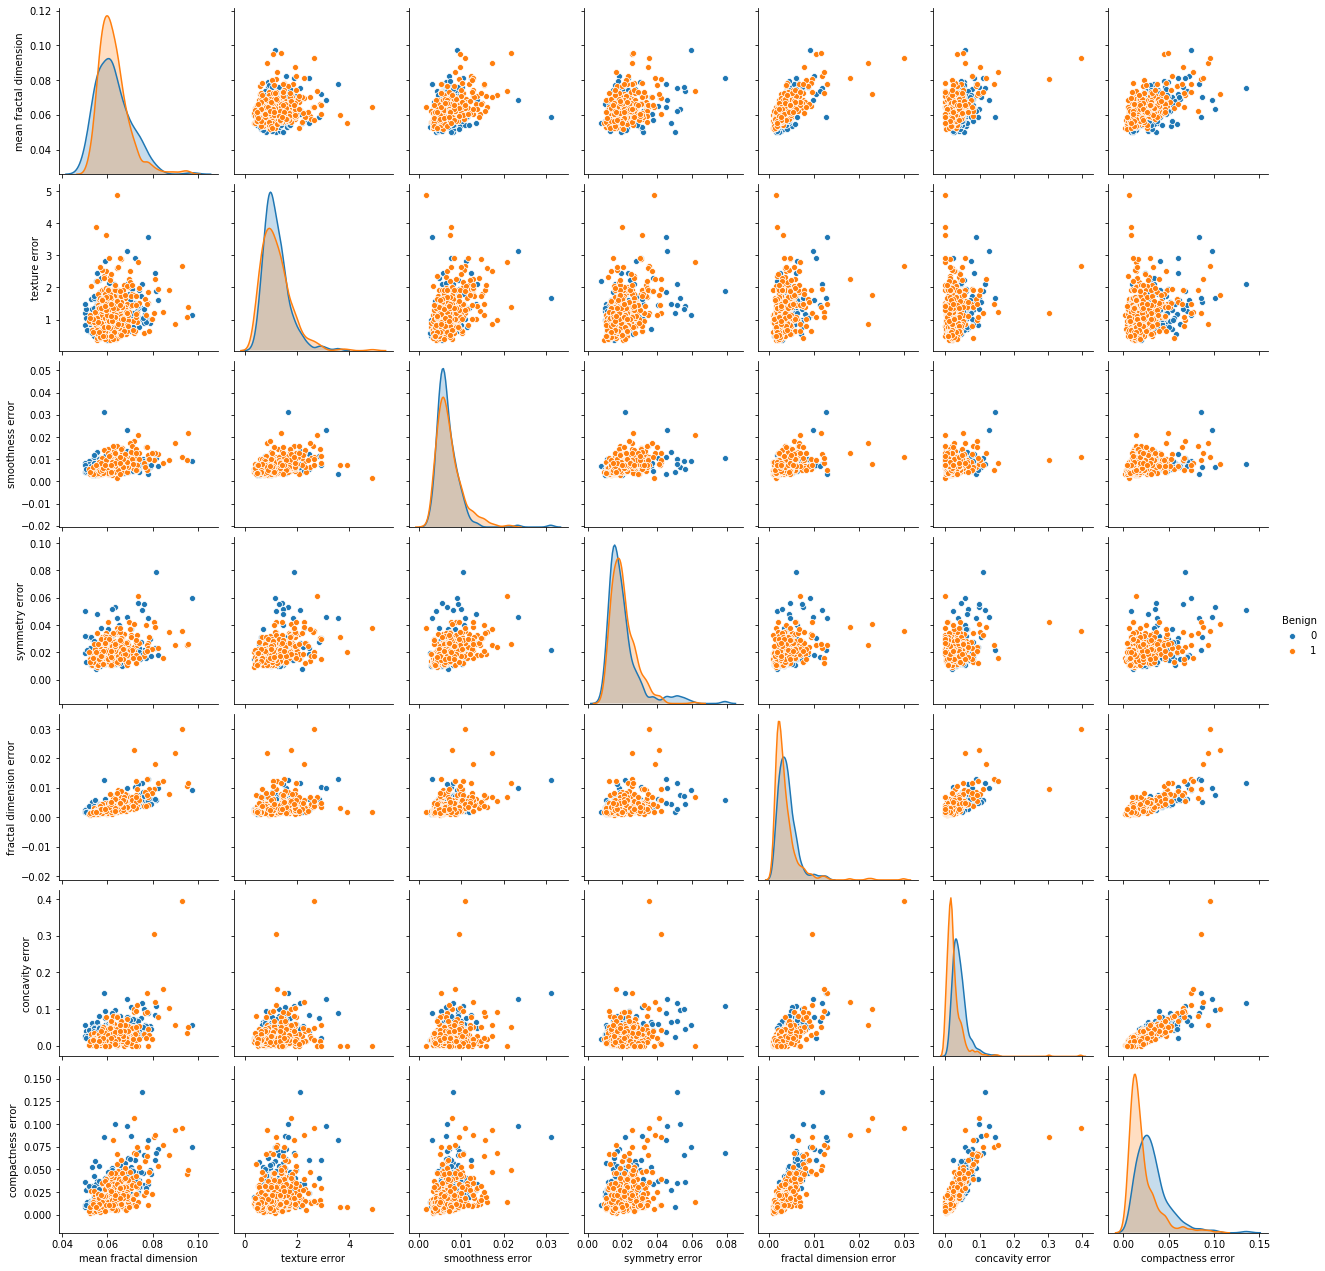

In [70]:
low_corr = data[['mean fractal dimension','texture error','smoothness error','symmetry error','fractal dimension error'\
                 ,'concavity error','compactness error','Benign']]
sns.pairplot(low_corr,hue='Benign')

In [71]:
data.drop(columns=['mean fractal dimension','texture error','smoothness error','symmetry error','fractal dimension error'\
          ,'concavity error','compactness error'],inplace=True,axis=1)

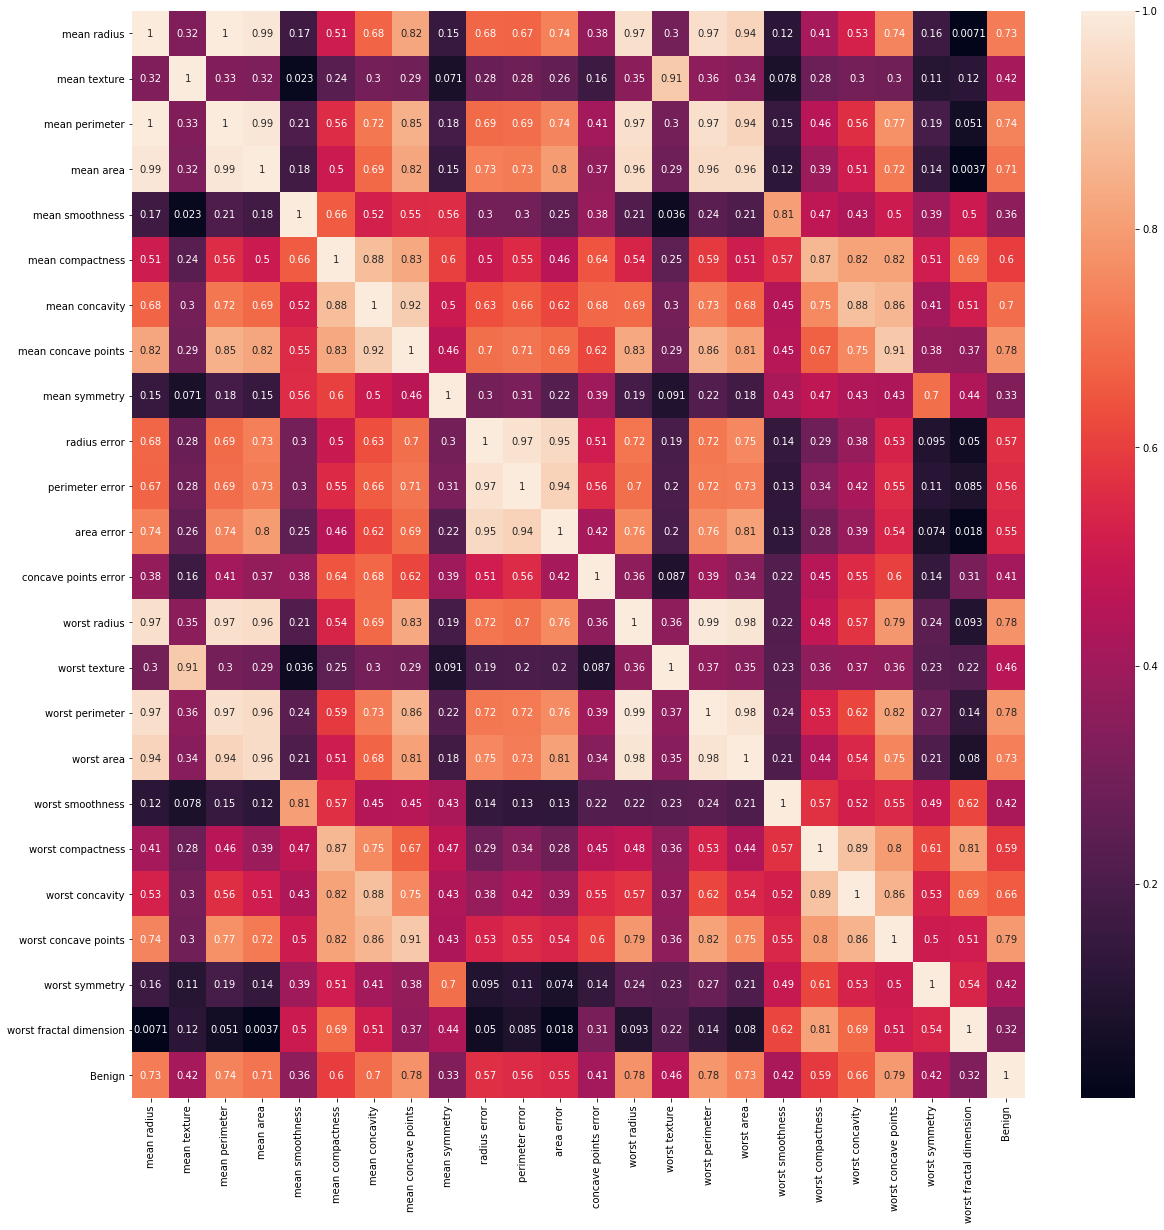

In [72]:
plt.figure(figsize=[20,20])
sns.heatmap(abs(data.corr()),annot=True)

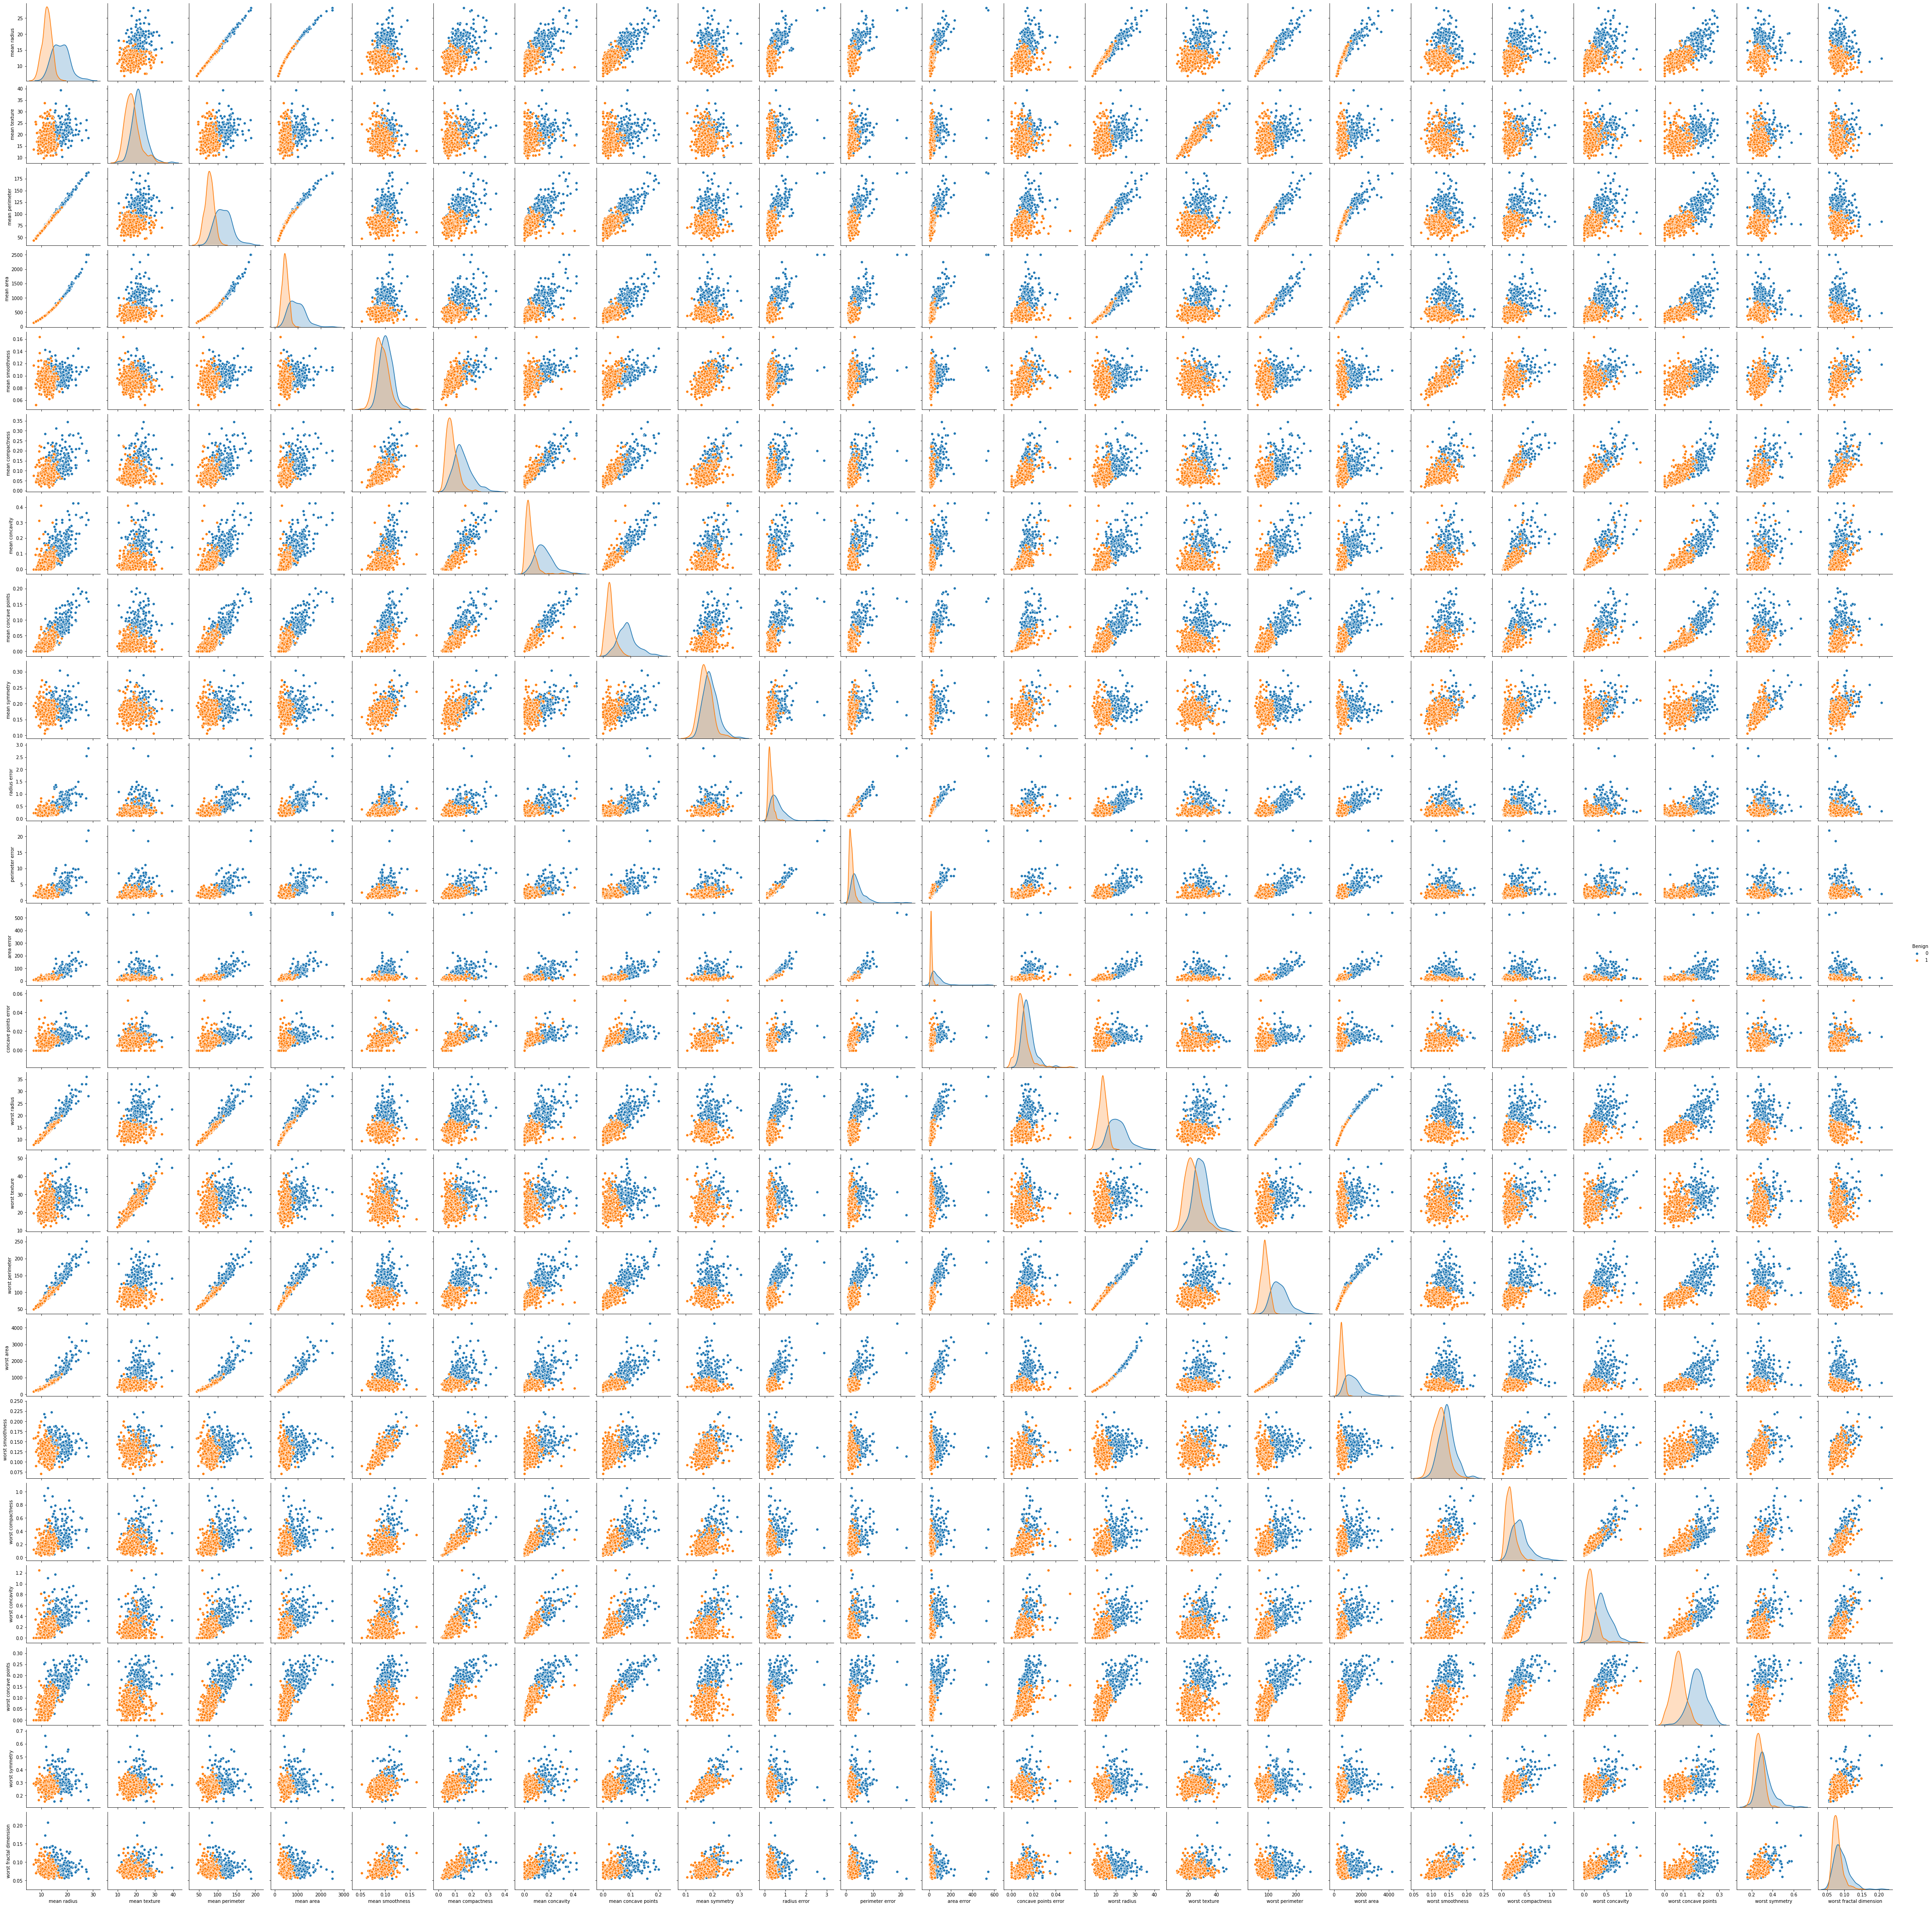

In [73]:
sns.pairplot(data,hue='Benign')

Train and Test Datasets

In [76]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

### SVM

In [83]:
from sklearn.svm import SVC

In [85]:
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [86]:
pred = model.predict(X_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

[[37  6]
 [ 0 71]]


## Standard Scaler

In [90]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train,y_train)
sc_X_test = sc.transform(X_test)

In [91]:
from sklearn.svm import SVC
model_1 = SVC()
model_1.fit(sc_X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
pred = model_1.predict(sc_X_test)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[41  2]
 [ 1 70]]


In [95]:
model_1.score(sc_X_test,y_test)

0.9736842105263158

## SVM with more freedom

In [100]:
from sklearn.svm import SVC
model_2 = SVC(C=5)
model_2.fit(sc_X_train,y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
pred = model_1.predict(sc_X_test)

In [102]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

[[41  2]
 [ 1 70]]


### Grid Search

In [119]:
from sklearn.model_selection import GridSearchCV
grid_param = {'C':[1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
grid = GridSearchCV(estimator=SVC(),param_grid=grid_param,verbose=4)
grid.fit(sc_X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.967, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.956, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.989, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.956, total=   0.0s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.956, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........... C=1, gamma=1, kernel=poly, score=0.945, total=   0.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.989, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.978, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] .......... C=1, gamma=0.1, kernel=rbf, score=0.923, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.912, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.879, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.912, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=1, gamma=0.1, kernel=sigmoid, score=0.901, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] .

[CV] ....... C=10, gamma=1, kernel=sigmoid, score=0.857, total=   0.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] ....... C=10, gamma=1, kernel=sigmoid, score=0.835, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.978, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.956, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.989, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.967, total=   0.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.945, total=   0.0s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] .

[CV] ......... C=100, gamma=1, kernel=poly, score=0.956, total=   0.0s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ......... C=100, gamma=1, kernel=poly, score=0.923, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.681, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.692, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.725, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.659, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.659, total=   0.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [120]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [112]:
pred = grid.predict(sc_X_test)

In [113]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

[[41  2]
 [ 0 71]]


## KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
from sklearn.model_selection import GridSearchCV
grid_param = {'n_neighbors':[1,10,50,80,100,300]}
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=grid_param,verbose=4)
grid.fit(sc_X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.912, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.923, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.956, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.967, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.934, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.945, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=80 ..................................................
[CV] ...................... n_neighbors=80, score=0.945, total=   0.0s
[CV] n_neighbors=80 ..................................................
[CV] ...................... n_neighbors=80, score=0.912, total=   0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.934, total=   0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.901, total=   0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.945, total=   0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.934, total=   0.0s
[CV] n_neighbors=100 .................................................
[CV] ..................... n_neighbors=100, score=0.901, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 10, 50, 80, 100, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [116]:
grid.best_params_

{'n_neighbors': 10}

In [117]:
pred = grid.predict(sc_X_test)

In [118]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

[[41  2]
 [ 2 69]]
